6909.918000000014
6457.140149995103


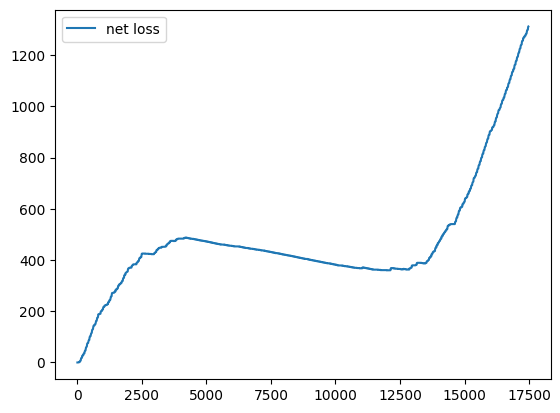

In [ ]:
import json
from matplotlib import pyplot as plt
import numpy as np

# Path to the log.json file
file_path = '/Users/antonlenander/git/CommunityFlex/log.json'

new_metrics = {}
messages = []


# Open and read the log.json file
with open(file_path, 'r') as file:
    log_data = json.load(file)
    # Iterate through the list in the "steps" key
    for step in log_data.get('steps', []):
        #print(step)
        metrics = step.get('metrics', {})
        messages.append(step.get('messages'))
        if isinstance(metrics, dict):
            for key, value in metrics.items():
                if key not in new_metrics:
                    new_metrics[key] = []
                new_metrics[key].append(value)
                
agent = 'H3'

#start = 336*4*6
#end = 336*4*7 - (336*3)
start = 0
end = 48*364

current_load = new_metrics[f'{agent}/current_load']
current_prod = new_metrics[f'{agent}/current_prod']
current_charge = new_metrics[f'{agent}/current_charge']
current_supply = new_metrics[f'{agent}/current_supply']
net_loss = new_metrics[f'{agent}/net_loss']
reward = new_metrics[f'{agent}/acc_reward']

total_load = new_metrics['env/total_load']
total_prod = new_metrics['env/total_prod']
total_charge = new_metrics['env/total_charge']
total_supply = new_metrics['env/total_supply']


total_self_consumption = new_metrics['env/self_consumption']
total_local_bought = new_metrics['env/current_local_bought'][1:]

total_avail_energy = new_metrics['env/total_avail_energy']
total_surplus_energy = new_metrics['env/total_surplus_energy']
total_net_loss = new_metrics['env/total_loss']


current_load = current_load[start:end]
current_prod = current_prod[start:end]
current_charge = current_charge[start:end]
current_supply = current_supply[start:end]
net_loss = net_loss[start:end]
reward = reward[start:end]

total_load = total_load[start:end]
total_prod = total_prod[start:end]
total_charge = total_charge[start:end]
total_supply = total_supply[start:end]
total_self_consumption = total_self_consumption[start:end]
total_local_bought = total_local_bought[start:end]
total_avail_energy = total_avail_energy[start:end]
total_surplus_energy = total_surplus_energy[start:end]
messages = messages[start:end]

print(sum(current_prod))
print(sum(current_load))

#plt.plot(current_load, label='load')
#plt.plot(current_prod, label='production')
#plt.plot(current_supply, label='supply balance')
#plt.plot(current_charge, label='battery charge')
#plt.plot(net_loss, label='net loss')
plt.plot(reward, label='reward')

plt.legend()
plt.show()

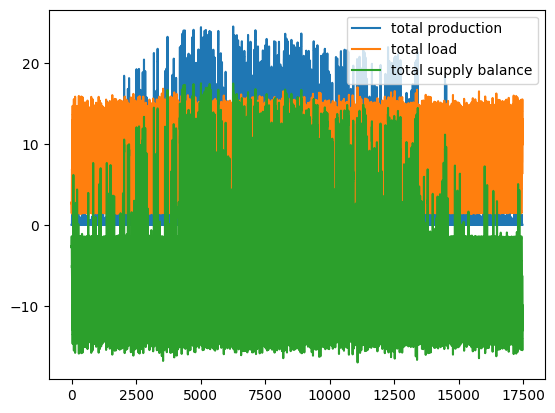

In [3]:
plt.plot(total_prod, label='total production')
plt.plot(total_load, label='total load')
plt.plot(total_supply, label='total supply balance')
plt.legend()
plt.show()

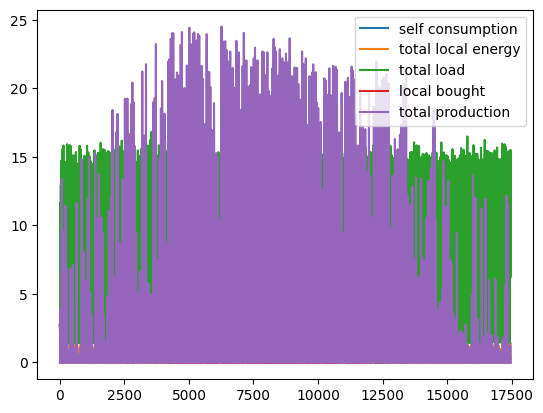

In [4]:
total_E_local = np.add(total_local_bought, total_self_consumption)

plt.plot(total_self_consumption, label='self consumption')
plt.plot(total_E_local, label='total local energy')
plt.plot(total_load, label='total load')
plt.plot(total_local_bought, label='local bought')
plt.plot(total_prod, label='total production')
# plt.plot(np.divide(net_loss, 150))
plt.legend()
plt.show()



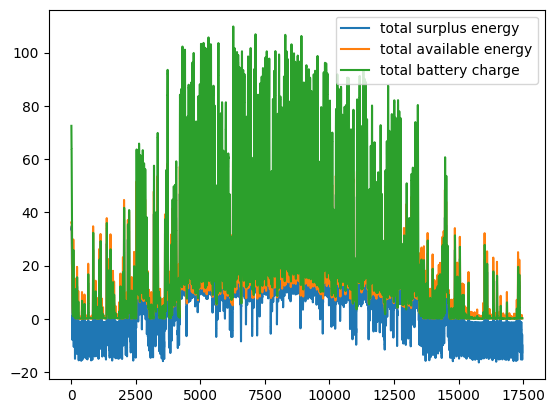

In [5]:
plt.plot(total_surplus_energy, label='total surplus energy')
plt.plot(total_avail_energy, label='total available energy')
plt.plot(total_charge, label='total battery charge')
plt.plot()
plt.legend()
plt.show()

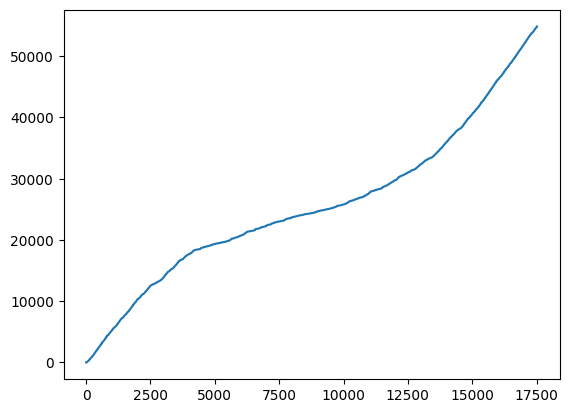

In [6]:
plt.plot(total_net_loss, label='total net loss')

(array([1759., 1212., 1006.,  740.,  730.,  586.,  620.,  676.,  731.,
         790.,  743.,  746.,  779.,  659.,  653.,  673.,  616.,  611.,
         697., 2445.]),
 array([0.00582033, 0.05557962, 0.10533891, 0.1550982 , 0.2048575 ,
        0.25461679, 0.30437608, 0.35413537, 0.40389466, 0.45365395,
        0.50341324, 0.55317253, 0.60293182, 0.65269111, 0.70245041,
        0.7522097 , 0.80196899, 0.85172828, 0.90148757, 0.95124686,
        1.00100615]),
 <BarContainer object of 20 artists>)

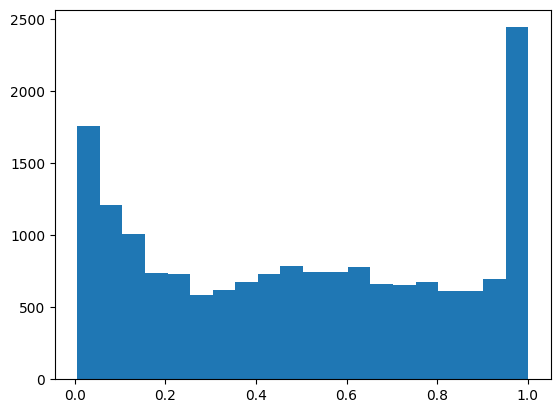

In [7]:
ss = np.divide(total_E_local, total_load)
plt.hist(ss, bins=20)

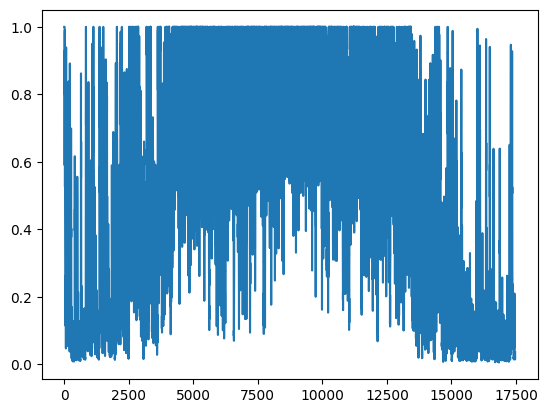

In [8]:
plt.plot(ss, label='self sufficiency')